# training log analysis

In [1]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import datetime

## Bodyweight
Over the summer of 2014 I started a cut starting from 75kg to 63.3 kg at my powerlifting competition in Sagueney.
I then started a slow bulk/maintainance up to now. 

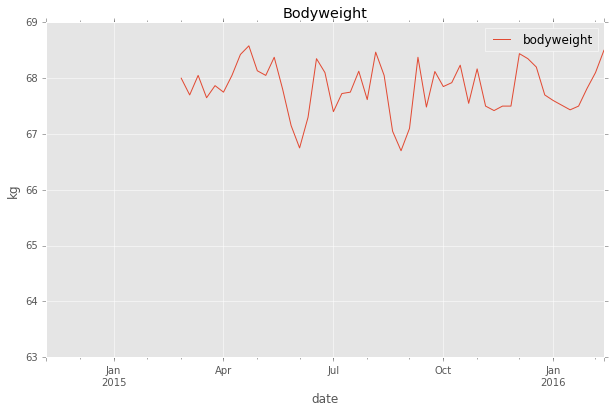

In [2]:
bodyweightData = pd.read_csv('data/bodyweight.csv', parse_dates = ['date'], index_col='date')
bodyweightData = bodyweightData.resample('W')
bodyweightPlot = bodyweightData.plot(figsize =(10,6), title = 'Bodyweight')
bodyweightPlot.set_ylabel('kg')

In [3]:
#Utility functions
def convertKgs(frame):
    def convert(row):
        if row['unit'] == 'kg':
            return 2.20462262 * row['weight']
        else:
            return row['weight']
    frame['weight'] = frame.apply(convert,axis='columns')

def toVolume(row):
    return row['sets']*row['reps']*row['weight']


## Squats
As with a powerlifting meet, let's take a look at squats first. 

In [4]:
squatsData = pd.read_csv('data/allSquats.csv', parse_dates = ['date'], index_col='date')
squatsData.columns

Index(['exercise', 'sets', 'reps', 'weight', 'unit'], dtype='object')

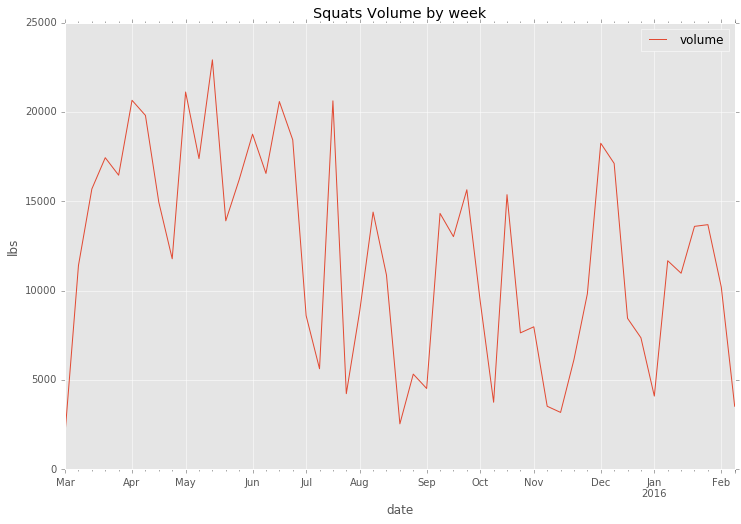

In [5]:

squatsVolume = squatsData.copy()

squatsVolume['volume'] = squatsData.apply(toVolume, axis='columns')

#filter out competition lifts
squatsVolume = squatsVolume[squatsVolume['unit']!= 'kg']
squatsVolume.drop(['sets','reps','weight', 'unit'], axis=1, inplace=True)

squatsVolumePlot = squatsVolume.resample('W', how = sum).plot(figsize=(12, 8), title = 'Squats Volume by week')
squatsVolumePlot.set_ylabel('lbs')

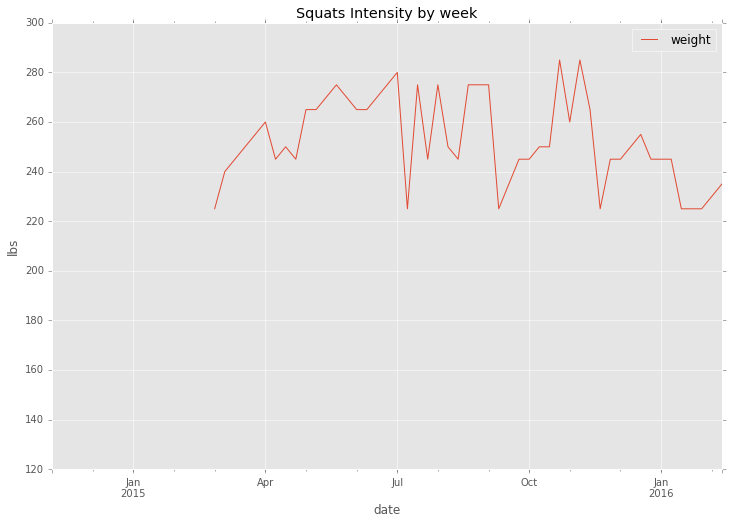

In [6]:
squatsIntensity = squatsData.copy()
squatsIntensity.drop(['sets','reps'], axis=1, inplace=True)

squatsIntensityPlot = squatsIntensity.resample('W', how = np.max).plot(figsize=(12, 8), title = 'Squats Intensity by week')
squatsIntensityPlot.set_ylabel('lbs')

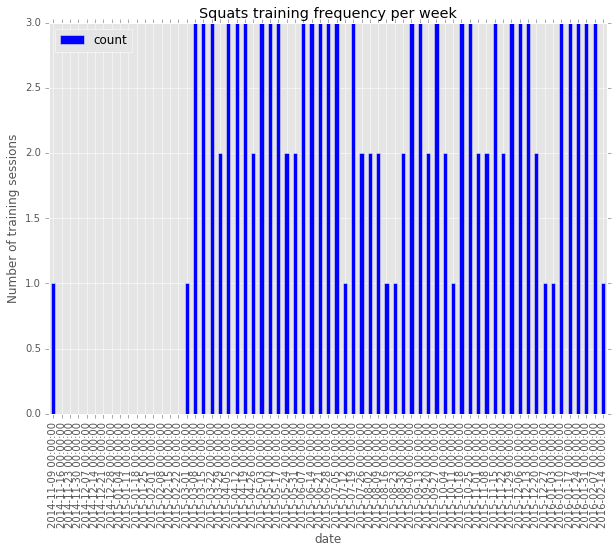

In [7]:
squatsFrequency = squatsData.copy()

squatsFrequency['count'] = squatsFrequency.apply(lambda row: 1,axis='columns')
squatsFrequency.drop(['sets','reps','weight','unit','exercise'], axis=1, inplace=True)

# we resample per day first to only count 1 session per day max
squatsFrequencyPlot = squatsFrequency.resample('D', how = 'first').resample('W', how = sum).plot(kind = 'bar',figsize = (10,7), title = 'Squats training frequency per week')
squatsFrequencyPlot.set_ylabel('Number of training sessions')

##Bench press
Next let's take a look at bench press. The lift I have had the greatest difficulty improving.

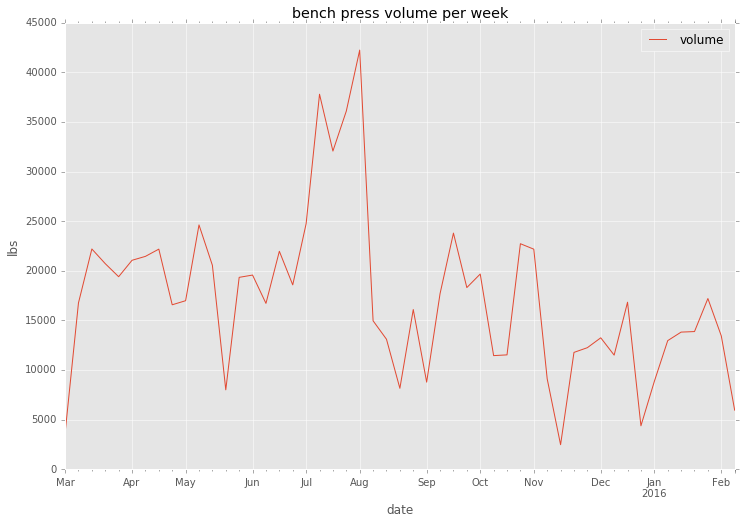

In [8]:
benchData = pd.read_csv('data/bench.csv',parse_dates = ['date'], index_col='date')

benchVolume = benchData.copy()
benchVolume['volume'] = benchData.apply(toVolume, axis='columns')

# filter out competition lifts
benchVolume = benchVolume[benchVolume['unit']!= 'kg']
benchVolume.drop(['sets','reps', 'weight', 'unit', 'exercise'], axis=1, inplace=True)

benchVolumePlot = benchVolume.resample('W', sum).plot(figsize = (12,8), title = 'bench press volume per week')
benchVolumePlot.set_ylabel('lbs')

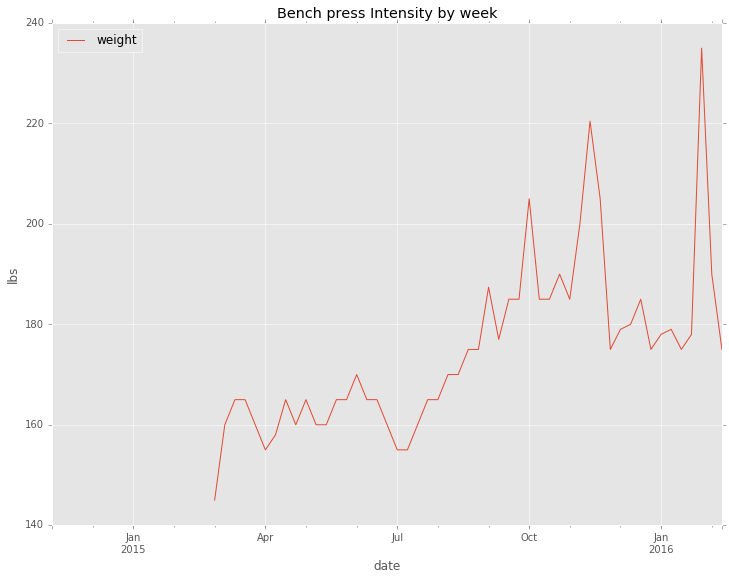

In [9]:
benchIntensity = benchData.copy()

#Convert kgs to lbs
convertKgs(benchIntensity)
benchIntensity.drop(['sets','reps', 'unit', 'exercise'], axis=1, inplace=True)

benchIntensityPlot = benchIntensity.resample('W', how = np.max).plot(figsize = (12,9), title = 'Bench press Intensity by week')
benchIntensityPlot.set_ylabel('lbs')

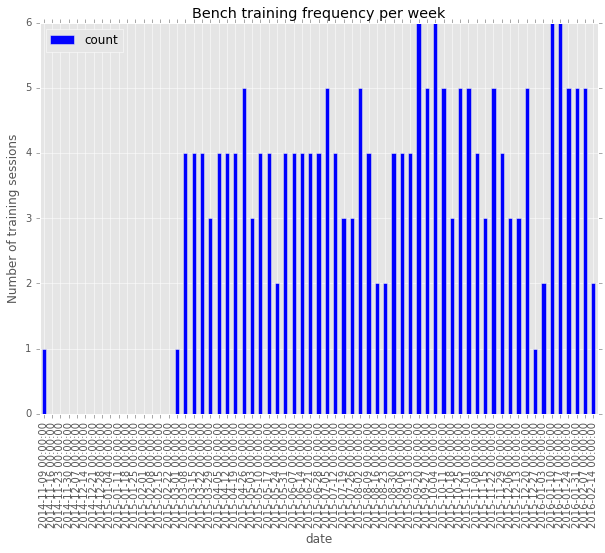

In [10]:
benchFrequency = benchData.copy()

benchFrequency['count'] = benchFrequency.apply(lambda row: 1,axis='columns')
benchFrequency.drop(['sets','reps','weight','unit','exercise'], axis=1, inplace=True)
#resample per day to count 1 bench session per day max and sum by week
benchFrequency = benchFrequency.resample('D', how = 'first').resample('W', how = sum)

benchFrequencyPlot = benchFrequency.plot(kind = 'bar',figsize = (10,7), title = 'Bench training frequency per week')
benchFrequencyPlot.set_ylabel('Number of training sessions')


##Deadlifts
The deadlift is the lift I used to think reliable with fairly low volume and frequency and it would still be there when I needed it. Recently I switched to sumo deadlifts because my form on conventional deadlifts would make KK blush, but since the switch I have come to realize that sumo takes more technical proficiency but is much harder to do volume with. 

In [11]:
deadliftData = pd.read_csv('data/deadlift.csv',parse_dates = ['date'], index_col='date')
convertKgs(deadliftData)

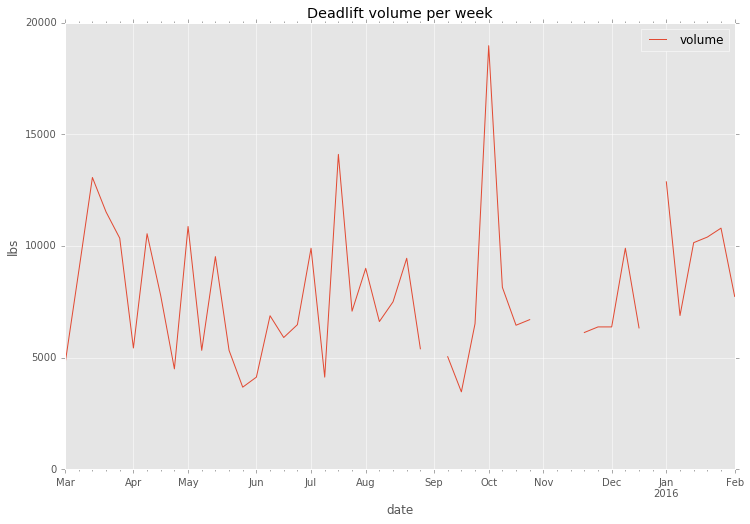

In [12]:
deadliftVolume = deadliftData.copy()
deadliftVolume['volume'] = deadliftVolume.apply(toVolume, axis = 'columns')

# filter out competition lifts
deadliftVolume = deadliftVolume[deadliftVolume['unit']!= 'kg']
deadliftVolume.drop(['sets','reps', 'weight', 'unit', 'exercise'], axis=1, inplace=True)

deadliftVolumePlot = deadliftVolume.resample('W', sum).plot(figsize = (12,8), title = 'Deadlift volume per week')
deadliftVolumePlot.set_ylabel('lbs')

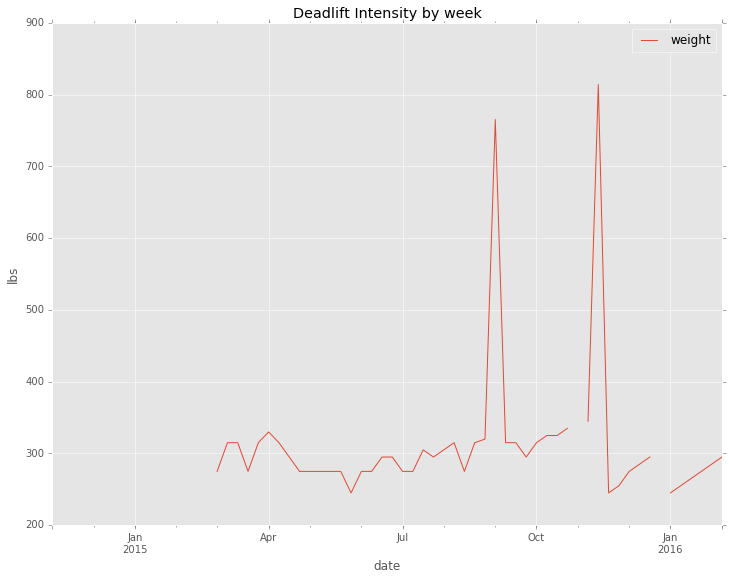

In [13]:
deadliftIntensity = deadliftData.copy()

#Convert kgs to lbs
convertKgs(deadliftIntensity)
deadliftIntensity.drop(['sets','reps', 'unit', 'exercise'], axis=1, inplace=True)

deadliftIntensityPlot = deadliftIntensity.resample('W', how = np.max).plot(figsize = (12,9), title = 'Deadlift Intensity by week')
deadliftIntensityPlot.set_ylabel('lbs')

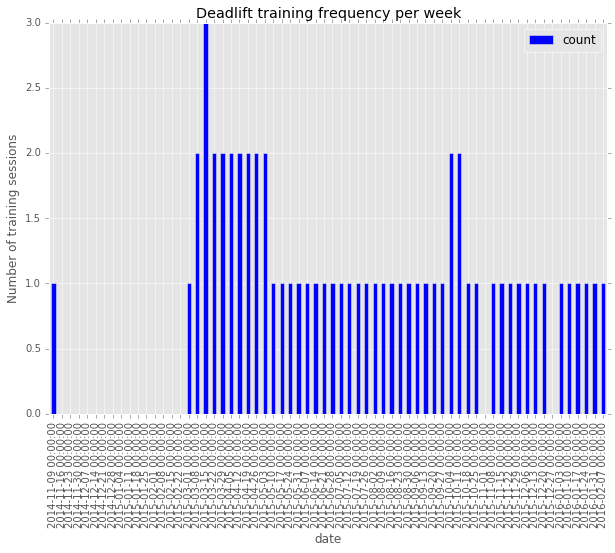

In [14]:
deadliftFrequency = deadliftData.copy()

deadliftFrequency['count'] = deadliftFrequency.apply(lambda row: 1,axis='columns')
deadliftFrequency.drop(['sets','reps','weight','unit','exercise'], axis=1, inplace=True)

deadliftFrequencyPlot = deadliftFrequency.resample('D',how = 'first').resample('W', how = sum).plot(kind = 'bar',figsize = (10,7), title = 'Deadlift training frequency per week')
deadliftFrequencyPlot.set_ylabel('Number of training sessions')